In [34]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.metrics import f1_score,precision_score,recall_score,ConfusionMatrixDisplay,confusion_matrix
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [5]:
df=pd.read_csv('/content/train.csv')

In [6]:
df.head(2)

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,False,1988,0,102366.0,7.000000,17,4.0,4,650000+
1,13380,austin,"4644 Hoffman Dr, Austin, TX 78749 is a single ...",Single Family,30.199486,-97.859947,0,False,1997,0,6534.0,6.666667,16,3.0,4,350000-450000


In [7]:
df=df.sample(frac=1).reset_index(drop=True)

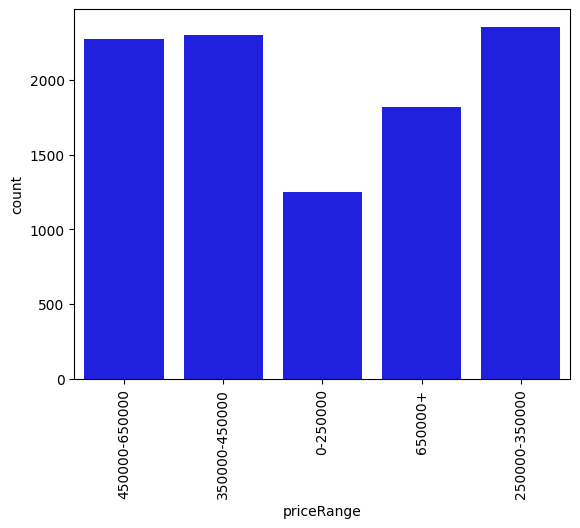

In [8]:
sns.countplot(data=df,x='priceRange',color='blue');
plt.xticks(rotation=90);

In [9]:
df['target']=df['priceRange'].map({'0-250000':0,'250000-350000':1,'350000-450000':2,'450000-650000':3,'650000+':4})

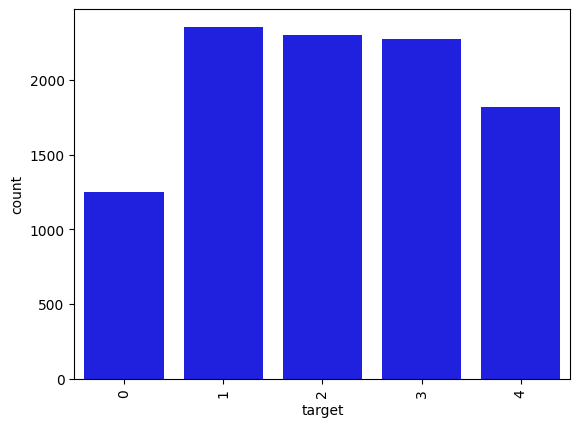

In [10]:
sns.countplot(data=df,x='target',color='blue');
plt.xticks(rotation=90);

In [11]:
df['hasSpa'].value_counts()

False    9175
True      825
Name: hasSpa, dtype: int64

<Axes: xlabel='hasSpa', ylabel='target'>

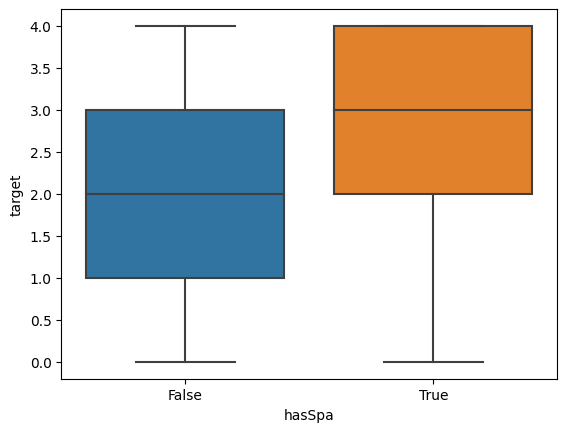

In [12]:
sns.boxplot(data=df,x='hasSpa',y='target')

In [13]:
import plotly.express as px

color_scale=[(0,'blue'),(1,'red')]
fig=px.scatter_mapbox(df,
                      lat="latitude",
                      lon='longitude',
                      hover_data=['avgSchoolRating'],
                      color="target",
                      color_continuous_scale=color_scale,
                      zoom=20,
                      height=800,
                      width=800)


fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"b":0})
fig.show()


In [14]:
df['homeType'].value_counts()

Single Family            9427
Condo                     333
Townhouse                 113
Multiple Occupancy         60
Residential                27
Apartment                  19
Mobile / Manufactured      10
MultiFamily                 5
Vacant Land                 4
Other                       2
Name: homeType, dtype: int64

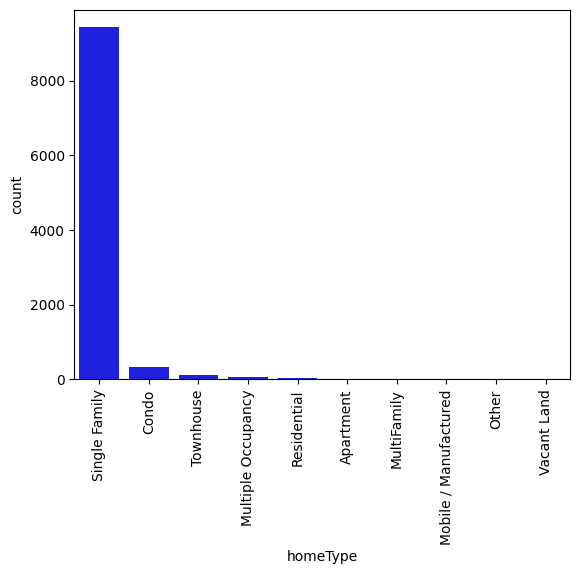

In [15]:
sns.countplot(data=df,x='homeType',color='blue');
plt.xticks(rotation=90);

In [16]:
df[(df['homeType']=='Other') | (df['homeType']=='Vacant Land') | (df['homeType']=='MultiFamily') | (df['homeType']=='Mobile / Manufactured')]

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange,target
1772,15065,austin,Great opportunity located in fabulous Rosedale...,MultiFamily,30.321972,-97.740158,0,False,1965,0,9016.0,7.000000,16,8.0,8,650000+,4
2265,273,austin,"4 Bedroom, 2 bath home with open floor plan. L...",Mobile / Manufactured,30.224667,-97.631195,0,False,2000,0,14810.4,3.000000,13,2.0,4,0-250000,0
3252,304,austin,"I am the owner of the home, that Zillow.com sh...",Mobile / Manufactured,30.336569,-97.870827,1,False,2020,0,11761.2,8.000000,14,2.0,3,650000+,4
3327,9531,austin,>>>-----Avail...,Other,30.279955,-97.722107,3,False,1995,0,6534.0,6.666667,15,2.0,3,650000+,4
3988,23,austin,Contact first listing agent for showing instru...,Mobile / Manufactured,30.087748,-97.705200,2,False,2007,0,107593.2,3.333333,14,5.0,8,350000-450000,2
4000,9726,austin,This quality free-standing home features a Che...,Vacant Land,30.275826,-97.714043,1,False,1925,0,6046.0,6.666667,15,2.0,3,250000-350000,1
4601,4311,austin,"7515 Northview Ln, Austin, TX 78724 is a mobil...",Mobile / Manufactured,30.308468,-97.638092,0,False,2009,0,4051.0,3.666667,14,2.0,2,0-250000,0
5873,10074,austin,"Within 5 miles of the University of Texas, the...",Mobile / Manufactured,30.275888,-97.676422,0,False,2001,0,45302.4,3.666667,14,2.0,3,450000-650000,3
6009,4576,austin,Private country paradise minutes from downtown...,Vacant Land,30.220169,-97.979004,4,True,1997,3,412948.8,7.000000,17,5.0,3,650000+,4
6669,7650,austin,ITIN OK! This home is in immaculate move-in co...,Mobile / Manufactured,30.391220,-97.633492,0,False,2014,0,4356.0,3.000000,14,2.0,3,0-250000,0


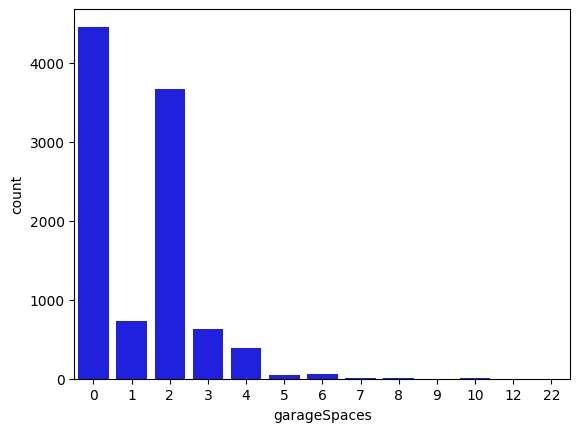

In [17]:
sns.countplot(data=df,x='garageSpaces',color='blue');


<Axes: xlabel='garageSpaces', ylabel='target'>

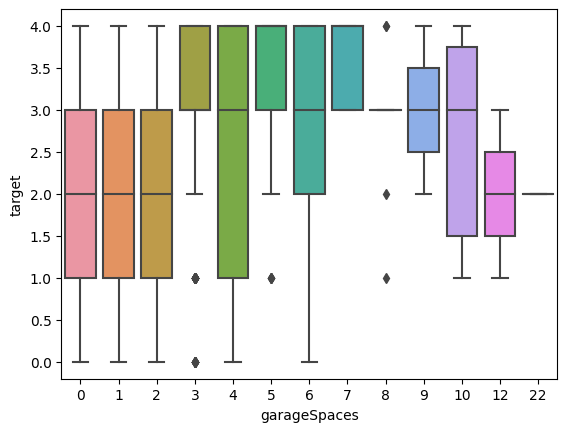

In [18]:
sns.boxplot(data=df,x='garageSpaces',y='target')

In [19]:
df[df['garageSpaces']>10]

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange,target
5227,11108,austin,Beautifully renovated single story mid-century...,Single Family,30.317060,-97.697220,12,False,1955,2,7797.0,3.000000,14,2.0,3,450000-650000,3
6482,6985,austin,Beautifully remodeled home in HOT 78745!! This...,Single Family,30.200857,-97.803902,12,False,1972,1,7927.0,4.000000,13,1.0,3,250000-350000,1
9841,6885,austin,Beautiful 2-story home located in highly sough...,Condo,30.189331,-97.792809,22,False,2016,3,6621.0,3.333333,13,3.0,4,350000-450000,2


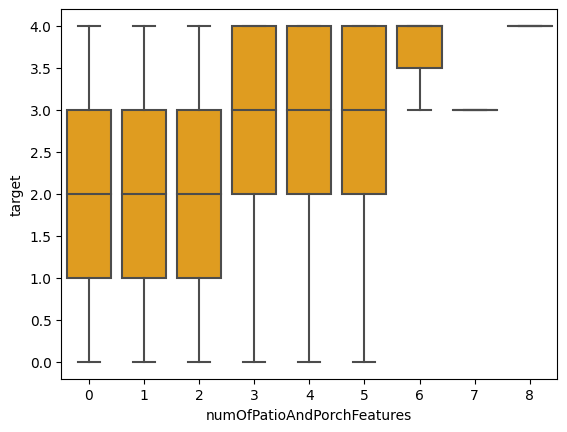

In [20]:
sns.boxplot(data=df,x='numOfPatioAndPorchFeatures',y='target',color='orange');

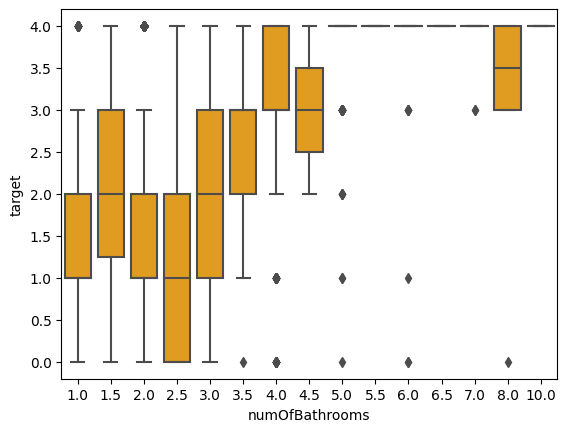

In [21]:
sns.boxplot(data=df,x='numOfBathrooms',y='target',color='orange');

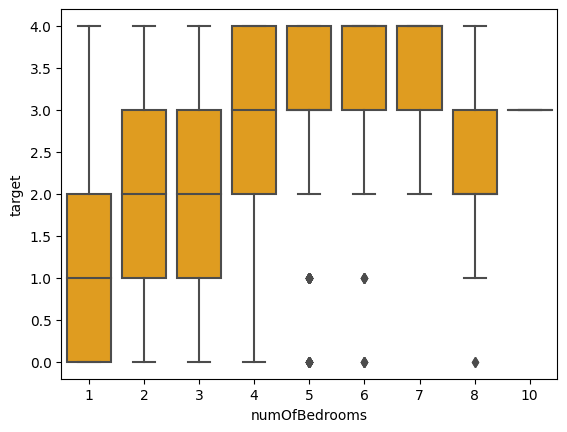

In [22]:
sns.boxplot(data=df,x='numOfBedrooms',y='target',color='orange');

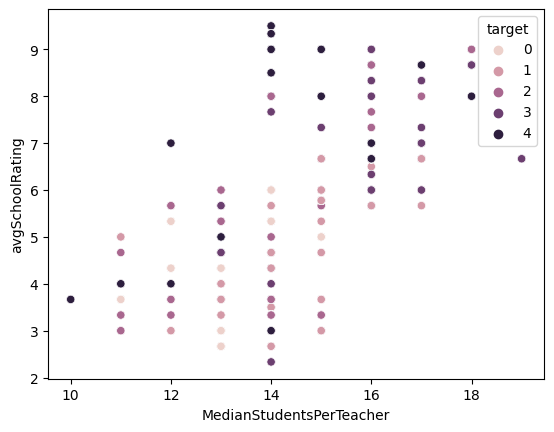

In [23]:
sns.scatterplot(data=df,x='MedianStudentsPerTeacher',y='avgSchoolRating',hue='target');

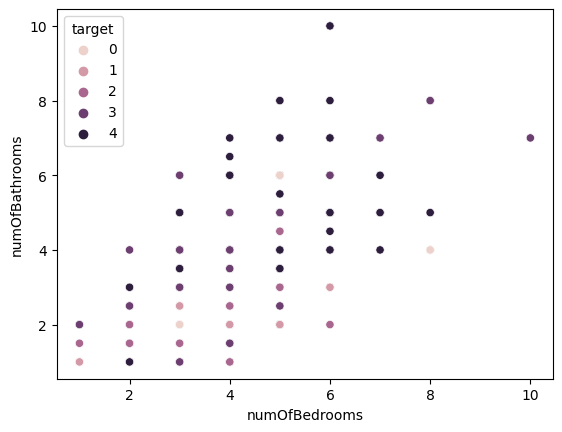

In [24]:
sns.scatterplot(data=df,x='numOfBedrooms',y='numOfBathrooms',hue='target');

In [25]:
df=df.assign(descp_length=lambda x: (x['description'].str.len()))

<Axes: xlabel='target', ylabel='descp_length'>

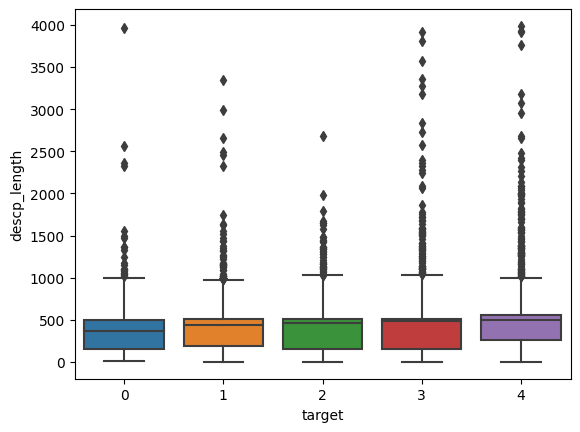

In [26]:
sns.boxplot(data=df,x='target',y='descp_length')

In [27]:
df_hm=df.drop(columns=['uid','city','description','homeType','priceRange','hasSpa'],axis=1)
person_corr=df_hm.corr()

<Axes: >

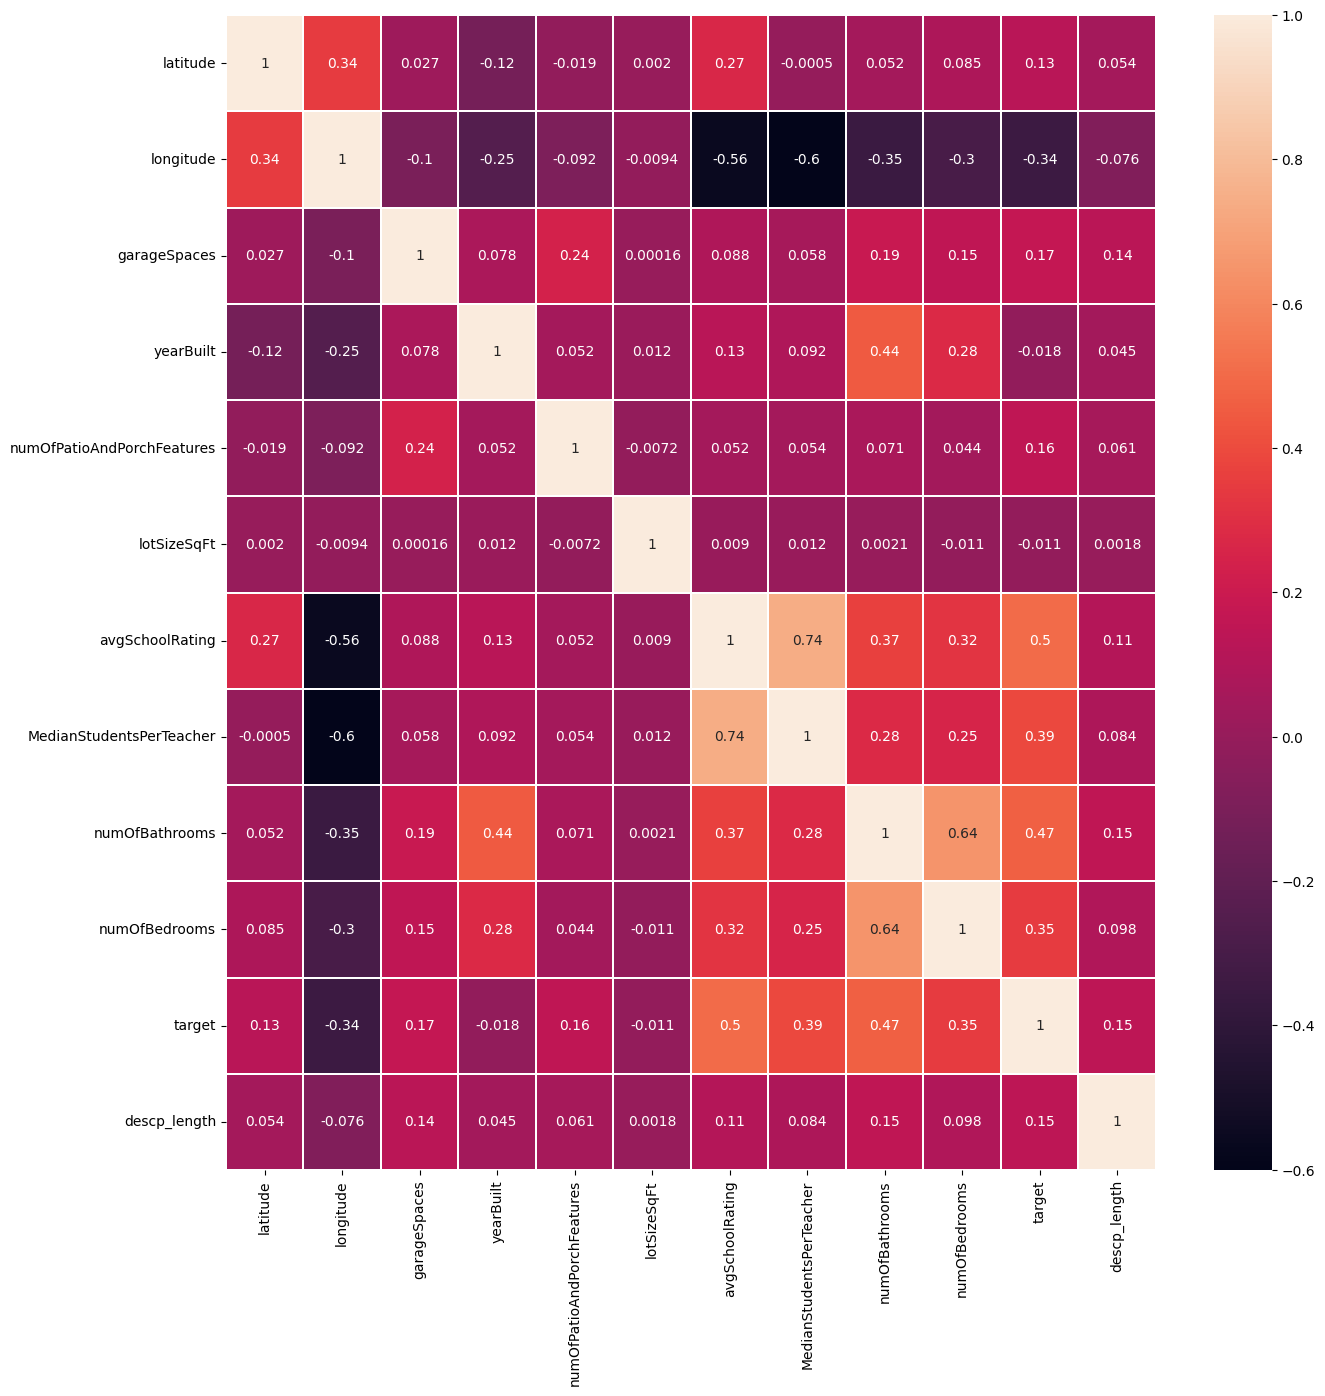

In [28]:
fig,ax=plt.subplots(figsize=(15,15))
sns.heatmap(data=person_corr,linewidths=0.10,annot=True,fmt='.2g',ax=ax)

#Baseline Model

Training for fold : 1
****fold:  0, train_f1_score : 0.46077927880100367, val_f1_score : 0.4548558638436324 , precision : 0.47733256677298497 , recall : 0.45301785082820806****
Training for fold : 2
****fold:  1, train_f1_score : 0.46671676596136286, val_f1_score : 0.45535089783555077 , precision : 0.4864400316164394 , recall : 0.4488333360722172****
Training for fold : 3
****fold:  2, train_f1_score : 0.4662471965860213, val_f1_score : 0.4580009052677941 , precision : 0.47951015575332717 , recall : 0.4548832567967433****
Training for fold : 4
****fold:  3, train_f1_score : 0.46081169119431936, val_f1_score : 0.46026289747123456 , precision : 0.49095328044017367 , recall : 0.45519630027500424****
Training for fold : 5
****fold:  4, train_f1_score : 0.4618249765596181, val_f1_score : 0.45374155996661314 , precision : 0.4779311504183795 , recall : 0.4499257935646881****


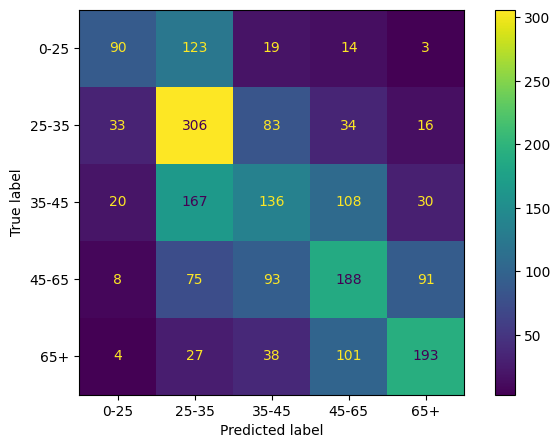

In [35]:
df=pd.read_csv('/content/train.csv')
seed=7
n_folds=5
label_hash_map={}

label_hash_map['label_encoder']={'0-250000':0,'250000-350000':1,'350000-450000':2,'450000-650000':3 ,'650000+':4 }


df['target']=df['priceRange'].map({'0-250000':0,'250000-350000':1,'350000-450000':2,'450000-650000':3 ,'650000+':4 })
df['hasSpa_encoded']=df['hasSpa'].map({False:0,True:1})


one_hot_columns=['city','homeType']
for column in one_hot_columns:
  onehot_encoder = OneHotEncoder(sparse_output=False, categories='auto',drop='first')
  onehot_encoder.fit(df[[column]])
  label_hash_map[column]=onehot_encoder.categories_
  feature=onehot_encoder.transform(df[[column]])
  df=pd.concat([df,pd.DataFrame(feature,columns=onehot_encoder.get_feature_names_out())],axis=1)


df.drop(labels=['uid','city','homeType','hasSpa','priceRange','description'],axis=1,inplace=True)


# Doing CV
df['kfold']=-1
df=df.sample(frac=1).reset_index(drop=True)

kf=StratifiedKFold(n_splits=5)

for f,(t_,v_) in enumerate(kf.split(X=df.drop('target',axis=1),y=df['target'])):
  df.loc[v_,'kfold']=f


from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

normalize_cols=['latitude', 'longitude', 'garageSpaces', 'numOfPatioAndPorchFeatures',
       'lotSizeSqFt', 'avgSchoolRating', 'MedianStudentsPerTeacher','yearBuilt',
       'numOfBathrooms', 'numOfBedrooms',]

for fold in range(n_folds):
  df_train=df[df.kfold!=fold].reset_index(drop=True)
  df_valid=df[df.kfold==fold].reset_index(drop=True)


  x_train=df_train.drop(["kfold","target"],axis=1)
  y_train=df_train['target']

  x_valid=df_valid.drop(["kfold","target"],axis=1)
  y_valid=df_valid['target']


  for column in normalize_cols:
    sc = StandardScaler()
    sc.fit(x_train[[column]])
    x_train[column]=sc.transform(x_train[[column]])
    x_valid[column]=sc.transform(x_valid[[column]])

    #with open(f'/content/{column}_scaler.pkl','wb') as f:
        #pickle.dump(sc, f)



  # fit model no training data
  model = lr=LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000,penalty='l2', C=1,random_state=seed)

  print(f"Training for fold : {fold+1}")

  model.fit(x_train, y_train)
  y_vpred=model.predict(x_valid)
  y_tpred=model.predict(x_train)


  t_f1_score = f1_score(y_train,y_tpred, average='macro')
  v_f1_score = f1_score(y_valid,y_vpred, average='macro')
  v_precision_score=precision_score(y_valid,y_vpred,average='macro')
  v_recall_score=recall_score(y_valid,y_vpred,average='macro')
  print (f"****fold:  {fold}, train_f1_score : {t_f1_score}, val_f1_score : {v_f1_score} , precision : {v_precision_score} , recall : {v_recall_score}****")


#Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_valid, y_vpred),
    display_labels=["0-25", "25-35", "35-45", "45-65","65+"],
)
cmp.plot(ax=ax)
plt.show()

XGBoost with feature engineering

In [36]:


def classify_school_district(value):
  if value==14:
    return 'par'
  elif value>14:
    return 'above_par'
  else:
    return 'below_par'


def numOfPatioAndPorchFeatures_scaler_transform(value):
  if value<=2 and value>=0:
    return 'less_feature'
  elif value<=5 and value>2:
    return 'medium_feature'
  else:
    return 'high_feature'

Training for fold : 1
****fold:  0, train_f1_score : 0.653419570244803, val_f1_score : 0.5969865880366061 , precision : 0.6184322278119307 , recall : 0.5905516986723074****
Training for fold : 2
****fold:  1, train_f1_score : 0.6546997825594975, val_f1_score : 0.5749566761621712 , precision : 0.5868670605410088 , recall : 0.5702031390507173****
Training for fold : 3
****fold:  2, train_f1_score : 0.6535012598520694, val_f1_score : 0.5939940312454388 , precision : 0.6129769158579645 , recall : 0.5890919423049027****
Training for fold : 4
****fold:  3, train_f1_score : 0.6477294176551975, val_f1_score : 0.61671187439608 , precision : 0.6367188703935436 , recall : 0.6110757828896849****
Training for fold : 5
****fold:  4, train_f1_score : 0.6558617205822399, val_f1_score : 0.5790330504901926 , precision : 0.6038727397429012 , recall : 0.5726234081251528****


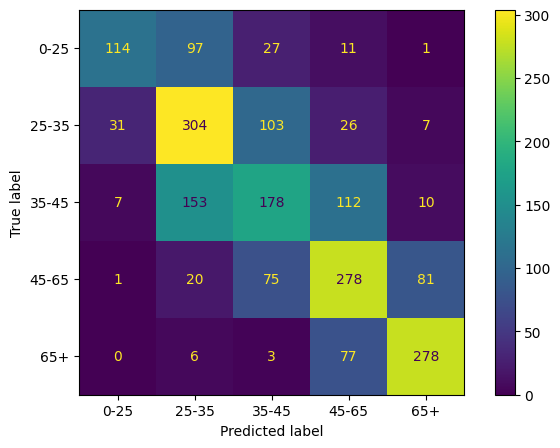

In [37]:
df=pd.read_csv('/content/train.csv')
seed=7
n_folds=5
label_hash_map={}

label_hash_map['label_encoder']={'0-250000':0,'250000-350000':1,'350000-450000':2,'450000-650000':3 ,'650000+':4 }

df['city']=df['city'].map({'driftwood' : 'other' , 'manchaca' : 'other', 'dripping springs' : 'other','west lake hills' : 'other',
                           'austin' :'austin','del valle': 'del valle' ,'pflugerville' : 'pflugerville' })
df['target']=df['priceRange'].map({'0-250000':0,'250000-350000':1,'350000-450000':2,'450000-650000':3 ,'650000+':4 })
df['hasSpa_encoded']=df['hasSpa'].map({False:0,True:1})
df=df.assign(descp_length=lambda x: (x['description'].str.len()))
df['home_age']=2024-df['yearBuilt']
df['sqft_perroom']=df['lotSizeSqFt']/(df['numOfBedrooms']+ df['numOfBathrooms'])
df['school_district_level']=df['MedianStudentsPerTeacher'].apply(classify_school_district)

one_hot_columns=['city','homeType','school_district_level']
for column in one_hot_columns:
  onehot_encoder = OneHotEncoder(sparse_output=False, categories='auto')#.set_output(transform="pandas")
  onehot_encoder.fit(df[[column]])
  feature=onehot_encoder.transform(df[[column]])
  df=pd.concat([df,pd.DataFrame(feature,columns=onehot_encoder.get_feature_names_out())],axis=1)


df.drop(labels=['uid','city','homeType','hasSpa','priceRange','description','yearBuilt','school_district_level'],axis=1,inplace=True)

#Train-Test Split

# Doing CV
df['kfold']=-1
df=df.sample(frac=1).reset_index(drop=True)

kf=StratifiedKFold(n_splits=5)

for f,(t_,v_) in enumerate(kf.split(X=df.drop('target',axis=1),y=df['target'])):
  df.loc[v_,'kfold']=f



from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

normalize_cols=['latitude', 'longitude', 'garageSpaces', 'numOfPatioAndPorchFeatures',
       'lotSizeSqFt', 'avgSchoolRating', 'MedianStudentsPerTeacher','home_age',
       'numOfBathrooms', 'numOfBedrooms','sqft_perroom','descp_length']




for fold in range(n_folds):
  df_train=df[df.kfold!=fold].reset_index(drop=True)
  df_valid=df[df.kfold==fold].reset_index(drop=True)


  x_train=df_train.drop(["kfold","target"],axis=1)
  y_train=df_train['target']

  x_valid=df_valid.drop(["kfold","target"],axis=1)
  y_valid=df_valid['target']

  for column in normalize_cols:
    sc = StandardScaler()
    sc.fit(x_train[[column]])
    x_train[column]=sc.transform(x_train[[column]])
    x_valid[column]=sc.transform(x_valid[[column]])


  # fit model no training data
  model = XGBClassifier(random_state=seed,max_depth=5,
                        verbosity=2,device='gpu',subsample=0.5,alpha=5,
                        learning_rate=0.05,objective='multi:softmax',num_class=5)

  print(f"Training for fold : {fold+1}")

  model.fit(x_train, y_train)
  y_vpred=model.predict(x_valid)
  y_tpred=model.predict(x_train)


  t_f1_score = f1_score(y_train,y_tpred, average='macro')
  v_f1_score = f1_score(y_valid,y_vpred, average='macro')
  v_precision_score=precision_score(y_valid,y_vpred,average='macro')
  v_recall_score=recall_score(y_valid,y_vpred,average='macro')
  print (f"****fold:  {fold}, train_f1_score : {t_f1_score}, val_f1_score : {v_f1_score} , precision : {v_precision_score} , recall : {v_recall_score}****")


#Plot confusion matrix
fig, ax = plt.subplots(figsize=(8, 5))
cmp = ConfusionMatrixDisplay(
    confusion_matrix(y_valid, y_vpred),
    display_labels=["0-25", "25-35", "35-45", "45-65","65+"],
)
cmp.plot(ax=ax)
plt.show()

In [1]:
!pip install  Optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.4/413.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.4 MB/s eta 0:00:00


In [38]:


import numpy as np
import optuna

import sklearn.metrics
from sklearn.model_selection import train_test_split
import xgboost as xgb


def objective(trial):
    df=pd.read_csv('/content/train_featured.csv')

    data=df.drop(['target'],axis=1)
    target=df['target']

    train_x, valid_x, train_y, valid_y = train_test_split(data, target, test_size=0.1)
    dtrain = xgb.DMatrix(train_x, label=train_y)
    dvalid = xgb.DMatrix(valid_x, label=valid_y)

    param = {
        "verbosity": 0,
        "objective": "multi:softmax",
        "num_class": 5,
        # use exact for small dataset.
        "tree_method": "exact",
        # defines booster, gblinear for linear functions.
        "booster": trial.suggest_categorical("booster", ["gbtree", "gblinear", "dart"]),
        # L2 regularization weight.
        "lambda": trial.suggest_float("lambda", 1e-8, 1.0, log=True),
        # L1 regularization weight.
        "alpha": trial.suggest_float("alpha", 1e-8, 1.0, log=True),
        # sampling ratio for training data.
        "subsample": trial.suggest_float("subsample", 0.2, 1.0),
        # sampling according to each tree.
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.2, 1.0),
    }

    if param["booster"] in ["gbtree", "dart"]:
        # maximum depth of the tree, signifies complexity of the tree.
        param["max_depth"] = trial.suggest_int("max_depth", 3, 9, step=2)
        # minimum child weight, larger the term more conservative the tree.
        param["min_child_weight"] = trial.suggest_int("min_child_weight", 2, 10)
        param["eta"] = trial.suggest_float("eta", 1e-8, 1.0, log=True)
        # defines how selective algorithm is.
        param["gamma"] = trial.suggest_float("gamma", 1e-8, 1.0, log=True)
        param["grow_policy"] = trial.suggest_categorical("grow_policy", ["depthwise", "lossguide"])

    if param["booster"] == "dart":
        param["sample_type"] = trial.suggest_categorical("sample_type", ["uniform", "weighted"])
        param["normalize_type"] = trial.suggest_categorical("normalize_type", ["tree", "forest"])
        param["rate_drop"] = trial.suggest_float("rate_drop", 1e-8, 1.0, log=True)
        param["skip_drop"] = trial.suggest_float("skip_drop", 1e-8, 1.0, log=True)

    bst = xgb.train(param, dtrain)
    pred_labels = bst.predict(dvalid)
    #pred_labels = np.rint(preds)
    accuracy = sklearn.metrics.f1_score(valid_y, pred_labels,average='macro')
    return accuracy


if __name__ == "__main__":
    study = optuna.create_study(direction="maximize")
    study.optimize(objective, n_trials=100, timeout=6000)

    print("Number of finished trials: ", len(study.trials))
    print("Best trial:")
    trial = study.best_trial

    print("  Value: {}".format(trial.value))
    print("  Params: ")
    for key, value in trial.params.items():
        print("    {}: {}".format(key, value))

[I 2024-01-05 15:30:05,520] A new study created in memory with name: no-name-0e4d9af2-0213-48f4-b680-440c564a835b
[W 2024-01-05 15:30:05,522] Trial 0 failed with parameters: {} because of the following error: FileNotFoundError(2, 'No such file or directory').
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/optuna/study/_optimize.py", line 200, in _run_trial
    value_or_values = func(trial)
  File "<ipython-input-38-d5a6b9cb8d00>", line 10, in objective
    df=pd.read_csv('/content/train_featured.csv')
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 211, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/util/_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/pandas/io/parsers/readers.py", line 950, in read_csv
    return _read(filepath_or_buffer, kwds)
  File "/usr/local/lib/python3.10/dist-packages/pan

FileNotFoundError: ignored